<a href="https://colab.research.google.com/github/Pittawas6330210206/bsc_dpdm22/blob/main/%5Bdataprep3%5D_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Normalization-Standardization
-https://scikit-learn.org/stable/modules/preprocessing.html?fbclid=IwAR1wjWI4eZXcuyhTi739VQ_7A1nNXejg_ZoWXag8kcmQLxKnULTFDLb7e7w

In [74]:
import pandas as pd

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
weather_data = pd.read_csv('/content/drive/MyDrive/Data Mining/Group3_ณัฐธิดา_ศุภัสรา_เฉลิมเกียรติ_พิทวัส.csv')

In [77]:
weather_data.head()

,จังหวัด,วัน,เดือน,ปี,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง,date
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8,2011-10-01
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0,2011-10-02
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1,2011-10-03
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8,2011-10-04
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1,2011-10-05


In [78]:
weather_data.shape

(8169, 13)

In [79]:
data_features = weather_data.iloc[:,4:-1] #เลือกคลอลัมท์ที่ 4 ถึงตัวลองสุดท้าย -1 คือลบตัวสุดท้ายออก

In [80]:
data_features

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,1007.49,86,3,10,3,22.9,25.6,22.1
3,1008.28,80,2,8,0,21.9,25.8,22.8
4,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...
8164,1019.23,66,2,1,0,13.2,20.3,14.0
8165,1018.46,68,2,1,0,14.3,20.7,13.9
8166,1016.68,65,1,0,0,15.2,22.7,15.0
8167,1015.31,62,2,3,0,15.8,23.8,17.5


In [81]:
data_features.describe() #ออกมาไม่ครบเนื่องจากอาจเป็น staring หรือเคลียร์ค่าไม่หมด

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด
count,8169.000000,8169.000000,8169.000000,8169.000000
mean,1013.016946,69.798262,18.084698,24.868405
std,3.224640,8.870501,3.751026,2.846185
min,1002.040000,38.000000,1.500000,11.800000
25%,1010.960000,64.000000,15.700000,23.300000
50%,1012.800000,69.000000,18.400000,25.300000
75%,1015.010000,75.000000,20.900000,27.000000
max,1026.100000,99.000000,25.600000,31.000000


In [82]:
data_features.dtypes

ความกด                float64
ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด        float64
อุณหภูมิตุ้มแห้ง       object
dtype: object

In [83]:
data_features[data_features.eq('-').any(1)] #เช็ดข้อมูลที่มี - เหลืออยู่

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
305,1009.88,78,4,4,-,23.5,27.9,24.3
306,1009.47,73,2,2,-,21.9,27.5,23.7
307,1008.08,69,3,3,-,20.7,27.3,22.5
308,1008.35,72,5,5,-,21.3,27.1,22.8
309,1009.30,72,2,2,-,21.3,27.0,23.5
...,...,...,...,...,...,...,...,...
8086,1016.96,62,2,-,0,13.4,21.6,14.8
8092,1014.85,69,2,-,0,15.9,22.3,16.2
8093,1012.80,66,1,-,0,15.8,23.3,16.5
8117,1014.94,68,2,-,0,17.4,24.2,17.8


In [84]:
data_features[data_features['ความเร็วลม'].eq('-')] #เช็ดข้อมูลที่มี - เหลืออยู่ในคลอลัมท์ ['ความเร็วลม']

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
1079,1012.65,87,-,-,53.3,23.5,25.8,24.5
1122,1011.47,61,-,-,-,19.7,28.5,22.7
1773,1008.50,73,-,4,0,20.2,25.6,20
1776,1009.51,89,-,7,1.2,22.0,24.2,21.1
1856,1009.45,73,-,4,0,23.9,29.7,24.9
1862,1011.50,70,-,6,0,21.0,27.5,22.2
1927,1015.58,65,-,2,0,15.0,22.7,15.3
1995,1014.22,67,-,1,-,19.4,26.5,20.6
2063,1013.33,68,-,-,-,14.0,21.0,-
2125,1011.17,72,-,8,0,21.3,27.1,23.0


In [85]:
data_features[data_features.eq('-').any(1) == False] #เลือกเฉพาะคลออลัมท์ที่ไม่มี -

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,1007.49,86,3,10,3,22.9,25.6,22.1
3,1008.28,80,2,8,0,21.9,25.8,22.8
4,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...
8164,1019.23,66,2,1,0,13.2,20.3,14.0
8165,1018.46,68,2,1,0,14.3,20.7,13.9
8166,1016.68,65,1,0,0,15.2,22.7,15.0
8167,1015.31,62,2,3,0,15.8,23.8,17.5


In [86]:
data_features[data_features.eq('T').any(1)] #เช็ดข้อมูลที่มี T เหลืออยู่ในคลอลัมท์

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
24,1011.34,73,5,5,T,21.8,27.4,22.7
102,1016.16,59,6,7,T,14.2,22.9,19.0
121,1012.34,67,4,10,T,18.7,25.3,21.6
125,1013.61,71,3,8,T,19.5,25.3,20.9
155,1007.07,81,2,7,T,24.1,27.9,24.2
...,...,...,...,...,...,...,...,...
6440,1016.34,74,2,5,T,18.7,23.9,19.8
6521,1013.64,77,3,10,T,19.3,23.6,22.0
7874,1008.57,78,2,4,T,21.6,26.0,24.3
7891,1010.69,68,2,3,T,19.4,26.1,20.0


In [87]:
data_features1 = data_features[data_features.eq('-').any(1) == False] #ประกาศตัวแปรข้อมูลที่ไม่มี - 

In [88]:
data_features_d = data_features1[data_features1.eq('T').any(1) == False] ##เลือกเฉพาะคลออลัมท์ที่ไม่มี T

In [89]:
data_features_d

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,1007.49,86,3,10,3,22.9,25.6,22.1
3,1008.28,80,2,8,0,21.9,25.8,22.8
4,1009.88,86,2,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...
8164,1019.23,66,2,1,0,13.2,20.3,14.0
8165,1018.46,68,2,1,0,14.3,20.7,13.9
8166,1016.68,65,1,0,0,15.2,22.7,15.0
8167,1015.31,62,2,3,0,15.8,23.8,17.5


In [90]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float) #เปลี่ยนข้อมูลให้เป็นตัวเลข float
data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)
data_features_d['อุณหภูมิตุ้มแห้ง'] = data_features_d['อุณหภูมิตุ้มแห้ง'].astype(float)

<ipython-input-90-3c7c156b13c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float) #เปลี่ยนข้อมูลให้เป็นตัวเลข float
<ipython-input-90-3c7c156b13c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
<ipython-input-90-3c7c156b13c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [91]:
data_features_d.describe()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,1012.731324,70.438253,2.284726,3.308832,1.556194,18.316874,25.002667,19.933570
std,3.158633,9.433792,1.209540,2.494353,6.816712,3.581330,2.720534,3.295887
min,1002.040000,38.000000,0.000000,0.000000,0.000000,1.500000,11.800000,6.800000
25%,1010.760000,64.000000,1.000000,1.000000,0.000000,16.100000,23.500000,17.900000
50%,1012.610000,69.000000,2.000000,3.000000,0.000000,18.500000,25.400000,20.300000
75%,1014.710000,77.000000,3.000000,5.000000,0.000000,21.000000,26.900000,22.500000
max,1026.100000,99.000000,10.000000,10.000000,112.400000,25.600000,31.000000,26.700000


##Standardization, or mean removal and variance scaling

In [92]:
import matplotlib

In [93]:
matplotlib.rcParams['figure.figsize']=[10,10]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s

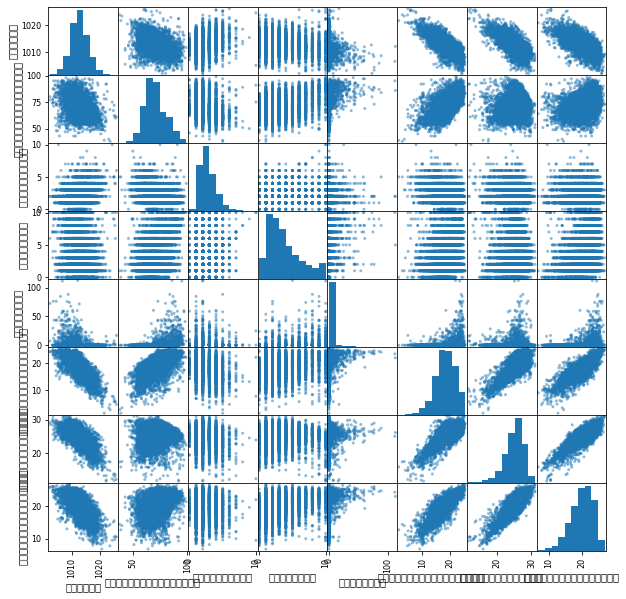

In [94]:
pd.plotting.scatter_matrix(data_features_d);

(array([  29.,  136.,  466., 1269., 1579.,  986.,  450.,  118.,   19.,
           9.]),
 array([1002.04 , 1004.446, 1006.852, 1009.258, 1011.664, 1014.07 ,
        1016.476, 1018.882, 1021.288, 1023.694, 1026.1  ]),
 <a list of 10 Patch objects>)

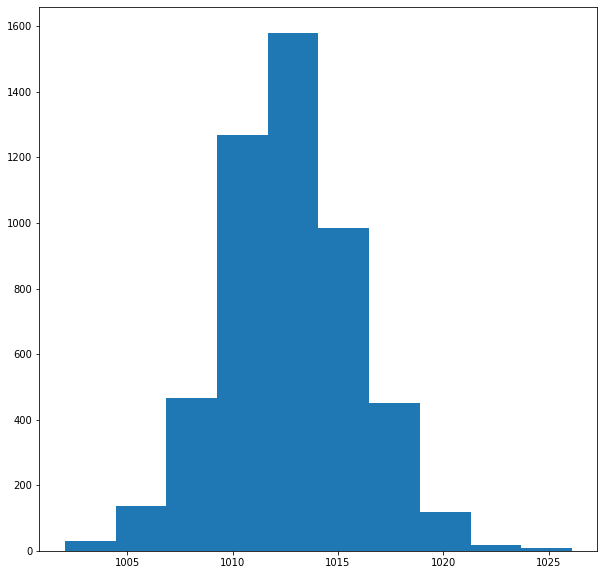

In [103]:
plt.hist(data_features_d['ความกด'])

In [97]:
from sklearn import preprocessing

In [98]:
#define
scaler = preprocessing.StandardScaler() #ปรับmeanให้เหลือ 0 และค่าเบี่ยงเบนมาตรฐานเหลือ 1 std
#train
scaler.fit(data_features_d)
#predict-transform
data_features_d_s = scaler.transform(data_features_d)

In [99]:
data_features_d_s # อยู่ในรูป array

array([[-2.29910857,  1.33170074,  0.5914187 , ...,  1.64288327,
         0.95480871,  1.47666181],
       [-1.92549238,  2.28581221, -0.23542385, ...,  1.58703258,
         0.21958617,  0.93047261],
       [-1.65952832,  1.64973789,  0.5914187 , ...,  1.27985377,
         0.21958617,  0.65737801],
       ...,
       [ 1.25024518, -0.57652221, -1.06226641, ..., -0.8703979 ,
        -0.8464865 , -1.49703494],
       [ 0.81647046, -0.89455937, -0.23542385, ..., -0.70284582,
        -0.44211411, -0.73843883],
       [ 0.10406672, -0.57652221, -0.23542385, ..., -0.14433889,
         0.14606392, -0.28328116]])

In [101]:
from matplotlib import pyplot as plt

(array([  29.,  136.,  466., 1269., 1579.,  986.,  450.,  118.,   19.,
           9.]),
 array([-3.3851285 , -2.62333143, -1.86153436, -1.09973729, -0.33794022,
         0.42385684,  1.18565391,  1.94745098,  2.70924805,  3.47104512,
         4.23284218]),
 <a list of 10 Patch objects>)

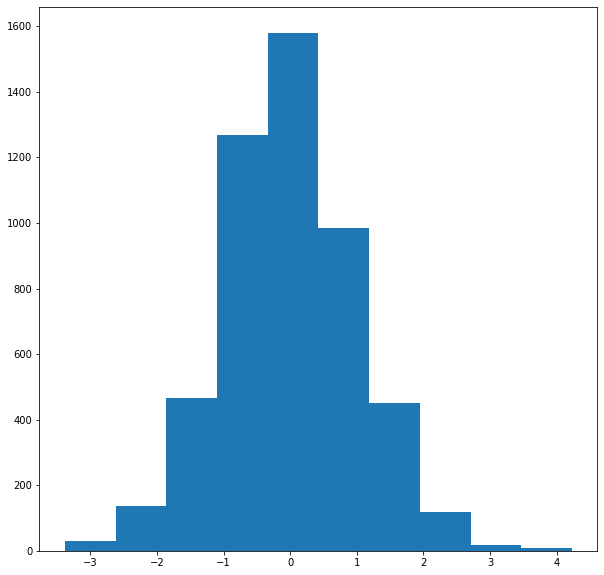

In [102]:
plt.hist(data_features_d_s[:,0])

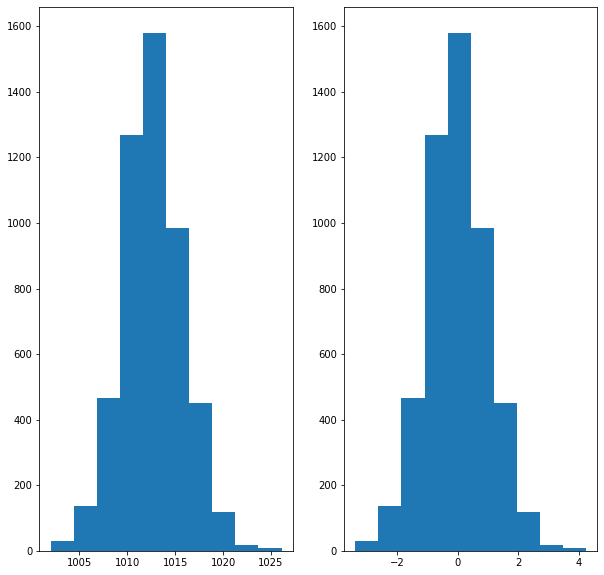

In [107]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,0]);

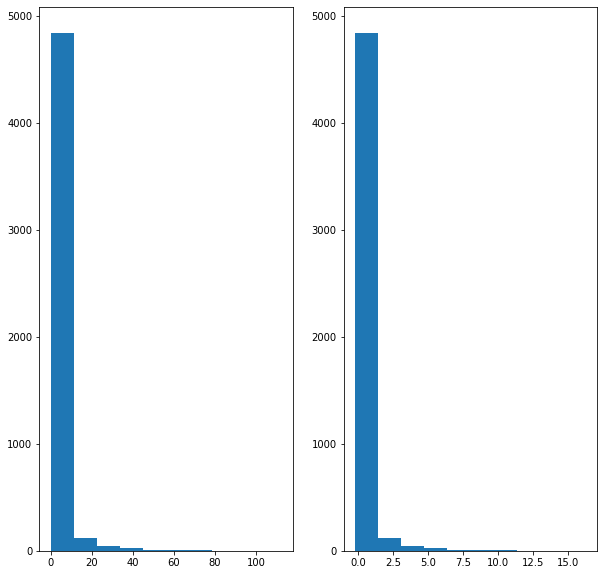

In [109]:
plt.subplot(1,2,1)
plt.hist(data_features_d['ปริมาณฝน'])
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,4]); #[:,4] เลือกคลอลัมท์ปริมาณน้ำฝน

##min-max Normalization
-เปลี่ยนค่า min เป็น 1
-เปลี่ยนค่า max เป็น 1

In [110]:
#define
scaler = preprocessing.MinMaxScaler() #ปรับmeanให้เหลือ 0 และค่าเบี่ยงเบนมาตรฐานเหลือ 1 std
#train
scaler.fit(data_features_d)
#predict-transform
data_features_d_m = scaler.transform(data_features_d)

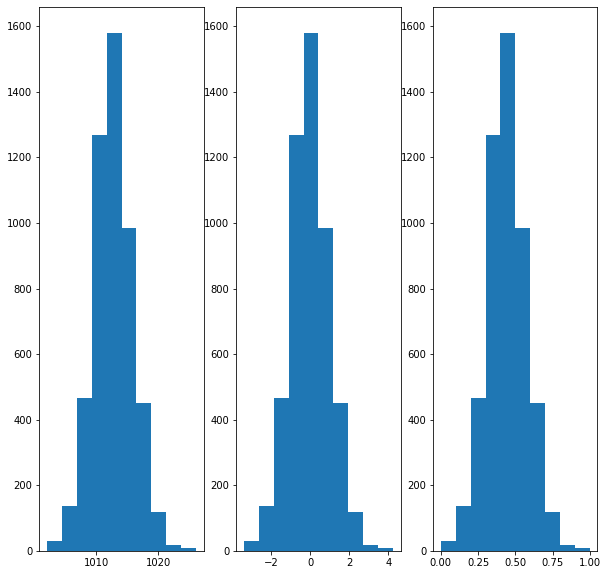

In [113]:
plt.subplot(1,3,1)
plt.hist(data_features_d['ความกด'])
plt.subplot(1,3,2)
plt.hist(data_features_d_s[:,0]);
plt.subplot(1,3,3)
plt.hist(data_features_d_m[:,0]);

## Discritization

In [116]:
home_data = pd.read_csv('/content/drive/MyDrive/Data Mining/นายพิทวัส พิมพ์บุสิทธิ์.csv')

In [117]:
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4


In [122]:
home_data.isnull().any()

post_id               False
number_of_rai          True
number_of_ngan         True
number_of_va           True
number_of_story        True
number_of_bedroom     False
number_of_bathroom     True
direction             False
furniture             False
usable_area           False
number_of_parking     False
project_name           True
district              False
zone                   True
street                 True
sell_price            False
d250-7/11             False
d500-7/11             False
d750-7/11             False
d1000-7/11            False
d1250-7/11            False
d1500-7/11            False
dtype: bool

In [126]:
home_data = home_data.dropna(subset = ['sell_price']) #ลบ record ที่sell_priceเป็นค่าว่าง(NaN)
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4


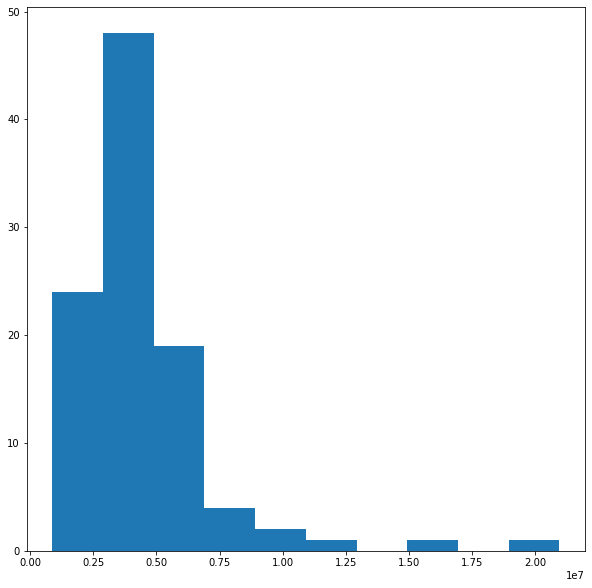

In [127]:
plt.hist(home_data['sell_price']);

### แปลงค่า sell_price
-ราคาที่ต่ำกว่า 5m เป็น 1

-ระหว่าง 5m - 10m ให้เป็น 2

-ราคา 10m ขึ้นไปให้้เป็น 3

In [129]:
home_data.dtypes

post_id               float64
number_of_rai         float64
number_of_ngan        float64
number_of_va          float64
number_of_story       float64
number_of_bedroom     float64
number_of_bathroom    float64
direction             float64
furniture             float64
usable_area           float64
number_of_parking     float64
project_name           object
district               object
zone                   object
street                 object
sell_price            float64
d250-7/11               int64
d500-7/11               int64
d750-7/11               int64
d1000-7/11              int64
d1250-7/11              int64
d1500-7/11              int64
dtype: object

In [134]:
import numpy as np